
## 1.3 Applying PyDP to famous ML dataset

The PyDP package provides a Python API into [Google's Differential Privacy library](https://github.com/google/differential-privacy). This example uses the alpha 0.1.7 version of the package that has the following limitations:



The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.



### [Titanic Dataset Challenge](https://www.kaggle.com/c/titanic/overview):

We ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Bias in 2020

Its 2020 and we have realized that there are inherent bias in our beliefs and system and moving forward, we need to remove these bias. To solve this, we decided, why not to formulate the most common ML dataset in a more responsible manner. Can we use the technology at hand to solve this?

### Enter Differential Privacy

Using DP, we aim to reduce such bias in the system and we want all passengers to give an equal chance of survival. 

Consider a scenario where there is a ship near the accident site but depending on the demographic of people in Titanic, it would decide whether it will do a rescue operation or not. 

Now you have the passenger Manifesto in your hand the nearby ship can ask you few statistical questions before it can make a decision. So it as
Now the passengers of Titanic decide that they will use DP to 


In [3]:
# Install the PyDP package
! pip install python-dp

     |████████████████████████████████| 2.8MB 1.4MB/s 


In [52]:
import pydp as dp # by convention our package is to be imported as dp (for Differential Privacy!)
from pydp.algorithms.laplacian import BoundedSum, BoundedMean, Count, Max, Min
import pandas as pd
import statistics # for calculating mean without applying differential privacy

In [97]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# get the cleaned dataset from our public github repo
url = 'https://raw.githubusercontent.com/chinmayshah99/PyDP/demo/titanic/examples/Tutorial%203-Titanic_demo/titanic_clean.csv'
df = pd.read_csv(url,sep=",", index_col=0)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


### Q1. What is the average age of passengers:

In [13]:
# calculates passenger age mean without applying differential privacy
def mean_age() -> float:
        return statistics.mean(list(df["Age"]))

In [61]:
# calculates passenger age mean applying differential privacy
def private_mean(privacy_budget: float) -> float:
        x = BoundedMean(privacy_budget, dtype="float")
        return x.quick_result(list(df["Age"]))

In [62]:
print("Mean: ", mean_age())
print("Private Mean: ", private_mean(0.8))

Mean:  29.445196408529743
Private Mean:  30.61579266512488


### Q2: How many Total passengners are on this ship?

In [26]:
# Function to calculate sum of carrots eaten without applying differential privacy.
def sum_passengers() -> int:
    return df.sum()[0]

In [21]:
# Function to calculate sum of carrots eaten applying differential privacy.
def private_sum(privacy_budget: float) -> int:
    x = BoundedSum(privacy_budget, dtype="float")
    return x.quick_result(list(df["Age"]))

In [22]:
print("Sum:\t" + str(sum_passengers()))
print("Private Sum:\t" + str(private_sum(1)))

Sum:	26235.67
Private Sum:	26271.465520165162


### Q3: What is the age of the youngest passenger on the ship?

In [58]:
# Function to return the minimum of the passengers age without appyling differential privacy.
def min_age() -> int:
    return df.min()[0]

In [59]:
# Function to return the minimum of the passengers age appyling differential privacy.
def private_min(privacy_budget: float) -> float:
    # 0 and 150 are the upper and lower limits for the search bound.
    x = Min(privacy_budget, 0, 150, dtype="float")
    return x.quick_result(list(df["Age"]))

In [60]:
print("Min:\t" + str(min_age()))
print("Private Min:\t" + str(private_min(1)))

Min:	0.42
Private Min:	4.5462177316125265


### Q4: What is the age of the oldest passenger on the ship?

In [73]:
# Function to return the minimum of the passengers age without appyling differential privacy.
def max_age() -> int:
    return df.max()[0]

In [74]:
# Function to return the minimum of the passengers age appyling differential privacy.
def private_max(privacy_budget: float) -> float:
    # 0 and 150 are the upper and lower limits for the search bound.
    x = Max(privacy_budget, 0, 150, dtype="float")
    return x.quick_result(list(df["Age"]))

In [76]:
print("Max:\t" + str(max_age()))
print("Private Max:\t" + str(private_max(1)))

Max:	80.0
Private Max:	56.23612229638035


### How many passengers are older than a certain age?

In [66]:
# Calculates number of passengers which age is more than "limit" age without applying differential privacy.
def count_above(limit: int) -> int:
    return df[df.Age > limit].count()[0]

In [69]:
# Calculates number of passengers which age is more than "limit" age applying differential privacy.
def private_count_above(privacy_budget: float, limit: int) -> int:
    x = Count(privacy_budget, dtype="float")
    return x.quick_result(list(df[df.Age > limit]["Age"]))

In [72]:
print("Above 70:\t" + str(count_above(70)))
print("private count above:\t" + str(private_count_above(1, 70)))

Above 70:	5
private count above:	6


### How many passengers are younger than a certain age?

In [90]:
# Calculates number of passengers which age is less than "limit" age without applying differential privacy.
def count_below(limit: int) -> int:
    return df[df.Age < limit].count()[0]

In [91]:
# Calculates number of passengers which age is less than "limit" age applying differential privacy.
def private_count_below(privacy_budget: float, limit: int) -> int:
    x = Count(privacy_budget, dtype="float")
    return x.quick_result(list(df[df.Age < limit]["Age"]))

In [92]:
print("Below 21:\t" + str(count_below(21)))
print("private count below:\t" + str(private_count_below(1, 21)))

Below 21:	184
private count below:	183


### Q5: What is the average fare of the passengers?

Consider the scenario that after the Tradegy, you are doing the data analysis for the local newspaper on the people who have survived. We divide the data into two bins, survived and not-survived. 

In the surived subset:

In [111]:
df.Survived.count()

891

In [118]:
np.sum(df['Survived'] == 1)

342

In [119]:
np.sum(df['Survived'] == 0)

549

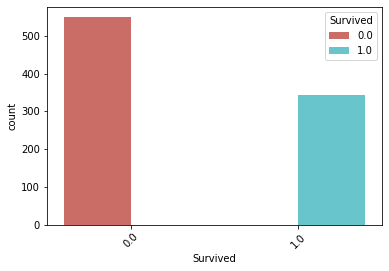

In [104]:
sns.countplot(x='Survived', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

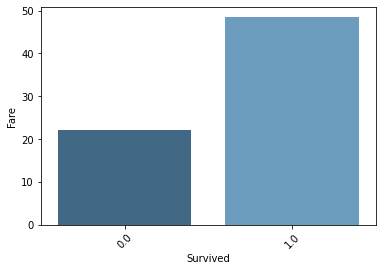

In [100]:
sns.barplot(x='Survived', y='Fare', data=df, estimator=np.mean, ci=None, palette='Blues_d')
plt.xticks(rotation=45)
plt.show()

### Q6 we want to find mean of fare they paid

### Q7 we want to find deviation of fare they paid